In [1]:
import cdsapi
cds = cdsapi.Client()

In [3]:
import cdsapi
import xarray as xr
from urllib.request import urlopen


# start the client
cds = cdsapi.Client()
# dataset you want to read
dataset = "reanalysis-era5-pressure-levels-monthly-means"
# flag to download data
download_flag = True
# api parameters 
params = {
    "format": "netcdf",
    "product_type": "monthly_averaged_reanalysis",
    "variable": "temperature",
    "pressure_level": '1000',
    'year':'2019',
    'month':['01','02','03'],
    "time": "00:00", 
    "grid": [1.0, 1.0],
    "area": [90, -180, -90, 180],
    }
# retrieves the path to the file
fl = cds.retrieve(dataset, params)
# download the file 
if download_flag:
    fl.download("./output.nc")
# load into memory
with urlopen(fl.location) as f:
    ds = xr.open_dataset(f.read())

/Users/bpo/opt/anaconda3/envs/xsimlab2/lib/python3.9/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2022-04-14 09:09:41,995 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels-monthly-means
/Users/bpo/opt/anaconda3/envs/xsimlab2/lib/python3.9/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2022-04-14 09:09:42,291 INFO Request is queued
/Users/bpo/opt/anaconda3/envs/xsimlab2/lib/python3.9/site-packages/urllib3/connectionpool.py:1043: InsecureReque

In [4]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 181, longitude: 360, time: 3)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
  * latitude   (latitude) float32 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * time       (time) datetime64[ns] 2019-01-01 2019-02-01 2019-03-01
Data variables:
    t          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-14 07:09:44 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

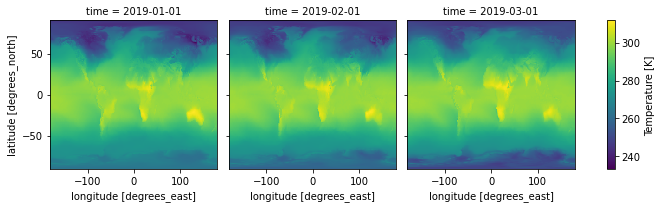

In [28]:
ds.isel(time=slice(0,3)).t.plot.pcolormesh(col='time',col_wrap=3)